## Now that we have a week's worth of data, let's dive into data cleaning and munging

In [24]:
df_uber = pd.read_csv('uber.csv')
df_uber.head()

C:\Users\Maxx\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,currency_code,date,day,display_name,distance,duration,end_latitude,end_location,end_longitude,estimate,...,low_estimate,main_temp,main_temp_max,main_temp_min,product_id,start_latitude,start_location,start_longitude,time,weather
0,USD,"February 23, 2018",Friday,POOL,1.69,420,42.355912,The Boston Common Frog Pond,-71.065922,$5-8,...,5.0,"0 272.61\r\nName: main_temp, dtype: float64","0 275.15\r\nName: main_temp_max, dtype: flo...","0 269.15\r\nName: main_temp_min, dtype: flo...",997acbb5-e102-41e1-b155-9df7de0a73f2,42.37245,Raw Fitness Performance,-71.07915,00:42:11,"0 Mist\r\nName: weather, dtype: object"
1,USD,"February 23, 2018",Friday,uberX,1.69,420,42.355912,The Boston Common Frog Pond,-71.065922,$7-10,...,7.0,"0 272.61\r\nName: main_temp, dtype: float64","0 275.15\r\nName: main_temp_max, dtype: flo...","0 269.15\r\nName: main_temp_min, dtype: flo...",55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.37245,Raw Fitness Performance,-71.07915,00:42:11,"0 Mist\r\nName: weather, dtype: object"
2,USD,"February 23, 2018",Friday,uberSUV,1.69,420,42.355912,The Boston Common Frog Pond,-71.065922,$23-29,...,23.0,"0 272.61\r\nName: main_temp, dtype: float64","0 275.15\r\nName: main_temp_max, dtype: flo...","0 269.15\r\nName: main_temp_min, dtype: flo...",6d318bcc-22a3-4af6-bddd-b409bfce1546,42.37245,Raw Fitness Performance,-71.07915,00:42:11,"0 Mist\r\nName: weather, dtype: object"
3,USD,"February 23, 2018",Friday,uberXL,1.69,420,42.355912,The Boston Common Frog Pond,-71.065922,$12-16,...,12.0,"0 272.61\r\nName: main_temp, dtype: float64","0 275.15\r\nName: main_temp_max, dtype: flo...","0 269.15\r\nName: main_temp_min, dtype: flo...",6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.37245,Raw Fitness Performance,-71.07915,00:42:11,"0 Mist\r\nName: weather, dtype: object"
4,USD,"February 23, 2018",Friday,UberBLACK,1.69,420,42.355912,The Boston Common Frog Pond,-71.065922,$17-22,...,17.0,"0 272.61\r\nName: main_temp, dtype: float64","0 275.15\r\nName: main_temp_max, dtype: flo...","0 269.15\r\nName: main_temp_min, dtype: flo...",6c84fd89-3f11-4782-9b50-97c468b19529,42.37245,Raw Fitness Performance,-71.07915,00:42:11,"0 Mist\r\nName: weather, dtype: object"


In [25]:
df_uber['date_time'] = df_uber['date'].astype(str) + ' ' + df_uber['time']

In [26]:
df_uber['date_time'] = pd.to_datetime(df_uber['date_time'])

In [27]:
df_uber['date_time'] = df_uber['date_time'].dt.round('T')

In [28]:
df_uber.isnull().sum()

currency_code             10721
date                          0
day                           0
display_name                  0
distance                      0
duration                      0
end_latitude                  0
end_location                  0
end_longitude                 0
estimate                      0
high_estimate             10721
localized_display_name        0
low_estimate              10721
main_temp                     0
main_temp_max                 0
main_temp_min                 0
product_id                    0
start_latitude                0
start_location                0
start_longitude               0
time                          0
weather                       0
date_time                     0
dtype: int64

In [29]:
df_uber = df_uber.dropna()

In [30]:
df_uber.drop(['currency_code', 'estimate', 'date', 'time', 'localized_display_name',
             'product_id'], axis=1, inplace=True)

In [31]:
df_uber = df_uber.set_index(pd.DatetimeIndex(df_uber['date_time']))

In [32]:
# taking a week's worth of data
df_uber = df_uber['2018-02-25 00:00:00' : '2018-03-03 23:59:00']

In [33]:
df_uber.drop('date_time', axis=1, inplace=True)

In [34]:
df_uber.head(6)

,day,display_name,distance,duration,end_latitude,end_location,end_longitude,high_estimate,low_estimate,main_temp,main_temp_max,main_temp_min,start_latitude,start_location,start_longitude,weather
date_time,,,,,,,,,,,,,,,,
2018-02-25,Sunday,POOL,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,13.0,9.0,39.52,44.6,33.8,42.361652,Urban AdvenTours,-71.052037,Clear
2018-02-25,Sunday,uberX,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,12.0,9.0,39.52,44.6,33.8,42.361652,Urban AdvenTours,-71.052037,Clear
2018-02-25,Sunday,uberSUV,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,35.0,28.0,39.52,44.6,33.8,42.361652,Urban AdvenTours,-71.052037,Clear
2018-02-25,Sunday,uberXL,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,20.0,15.0,39.52,44.6,33.8,42.361652,Urban AdvenTours,-71.052037,Clear
2018-02-25,Sunday,UberBLACK,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,25.0,19.0,39.52,44.6,33.8,42.361652,Urban AdvenTours,-71.052037,Clear
2018-02-25,Sunday,uberWAV,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,12.0,9.0,39.52,44.6,33.8,42.361652,Urban AdvenTours,-71.052037,Clear


In [35]:
df_uber['main_temp'] = df_uber['main_temp'].astype(np.float64)
df_uber['main_temp_max'] = df_uber['main_temp_max'].astype(np.float64)
df_uber['main_temp_min'] = df_uber['main_temp_min'].astype(np.float64)

In [36]:
df_lyft = pd.read_csv('lyft.csv', error_bad_lines=False)
df_lyft.head()

C:\Users\Maxx\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,1,6,7,12,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,can_request_ride,cost_token,currency,date,day,display_name,end_latitude,end_longitude,estimated_cost_cents_max,estimated_cost_cents_min,...,estimated_duration_seconds,is_valid_estimate,primetime_percentage,ride_type,start_latitude,start_longitude,time,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,True,NaN,USD,23-Feb-18,Friday,Lyft Premier,42.3559,-71.0659,1526.0,1526.0,...,542,True,0%,lyft_premier,42.37245,-71.0791,0:42:11,NaN,NaN,NaN
1,True,NaN,USD,23-Feb-18,Friday,Lyft Line,42.3559,-71.0659,523.0,523.0,...,542,True,0%,lyft_line,42.37245,-71.0791,0:42:11,NaN,NaN,NaN
2,True,NaN,USD,23-Feb-18,Friday,Lyft Lux,42.3559,-71.0659,1986.0,1986.0,...,542,True,0%,lyft_lux,42.37245,-71.0791,0:42:11,NaN,NaN,NaN
3,True,NaN,USD,23-Feb-18,Friday,Lyft,42.3559,-71.0659,780.0,780.0,...,542,True,0%,lyft,42.37245,-71.0791,0:42:11,NaN,NaN,NaN
4,True,NaN,USD,23-Feb-18,Friday,Lyft Plus,42.3559,-71.0659,1317.0,1317.0,...,542,True,0%,lyft_plus,42.37245,-71.0791,0:42:11,NaN,NaN,NaN


In [37]:
df_lyft['date_time'] = df_lyft['date'] + ' ' + df_lyft['time']

In [38]:
df_lyft = df_lyft.set_index(pd.DatetimeIndex(df_lyft['date_time']))
df_lyft.head()

,can_request_ride,cost_token,currency,date,day,display_name,end_latitude,end_longitude,estimated_cost_cents_max,estimated_cost_cents_min,...,is_valid_estimate,primetime_percentage,ride_type,start_latitude,start_longitude,time,Unnamed: 18,Unnamed: 19,Unnamed: 20,date_time
date_time,,,,,,,,,,,,,,,,,,,,,
2018-02-23 00:42:11,True,NaN,USD,23-Feb-18,Friday,Lyft Premier,42.3559,-71.0659,1526.0,1526.0,...,True,0%,lyft_premier,42.37245,-71.0791,0:42:11,NaN,NaN,NaN,23-Feb-18 0:42:11
2018-02-23 00:42:11,True,NaN,USD,23-Feb-18,Friday,Lyft Line,42.3559,-71.0659,523.0,523.0,...,True,0%,lyft_line,42.37245,-71.0791,0:42:11,NaN,NaN,NaN,23-Feb-18 0:42:11
2018-02-23 00:42:11,True,NaN,USD,23-Feb-18,Friday,Lyft Lux,42.3559,-71.0659,1986.0,1986.0,...,True,0%,lyft_lux,42.37245,-71.0791,0:42:11,NaN,NaN,NaN,23-Feb-18 0:42:11
2018-02-23 00:42:11,True,NaN,USD,23-Feb-18,Friday,Lyft,42.3559,-71.0659,780.0,780.0,...,True,0%,lyft,42.37245,-71.0791,0:42:11,NaN,NaN,NaN,23-Feb-18 0:42:11
2018-02-23 00:42:11,True,NaN,USD,23-Feb-18,Friday,Lyft Plus,42.3559,-71.0659,1317.0,1317.0,...,True,0%,lyft_plus,42.37245,-71.0791,0:42:11,NaN,NaN,NaN,23-Feb-18 0:42:11


In [39]:
df_lyft.index = df_lyft.index.round('T')

In [40]:
df_lyft = df_lyft['2018-02-25 00:00:00' : '2018-03-03 23:59:00']

In [41]:
df_lyft.head()

,can_request_ride,cost_token,currency,date,day,display_name,end_latitude,end_longitude,estimated_cost_cents_max,estimated_cost_cents_min,...,is_valid_estimate,primetime_percentage,ride_type,start_latitude,start_longitude,time,Unnamed: 18,Unnamed: 19,Unnamed: 20,date_time
date_time,,,,,,,,,,,,,,,,,,,,,
2018-02-25,True,NaN,USD,25-Feb-18,Sunday,Lyft Premier,42.363,-71.0824,2081.0,2081.0,...,True,0%,lyft_premier,42.361652,-71.052,0:00:04,NaN,NaN,NaN,25-Feb-18 0:00:04
2018-02-25,True,NaN,USD,25-Feb-18,Sunday,Lyft Line,42.363,-71.0824,352.0,352.0,...,True,0%,lyft_line,42.361652,-71.052,0:00:04,NaN,NaN,NaN,25-Feb-18 0:00:04
2018-02-25,True,NaN,USD,25-Feb-18,Sunday,Lyft Lux,42.363,-71.0824,2709.0,2709.0,...,True,0%,lyft_lux,42.361652,-71.052,0:00:04,NaN,NaN,NaN,25-Feb-18 0:00:04
2018-02-25,True,NaN,USD,25-Feb-18,Sunday,Lyft,42.363,-71.0824,1034.0,1034.0,...,True,0%,lyft,42.361652,-71.052,0:00:04,NaN,NaN,NaN,25-Feb-18 0:00:04
2018-02-25,True,NaN,USD,25-Feb-18,Sunday,Lyft Plus,42.363,-71.0824,1791.0,1791.0,...,True,0%,lyft_plus,42.361652,-71.052,0:00:04,NaN,NaN,NaN,25-Feb-18 0:00:04


In [42]:
df_lyft.index

DatetimeIndex(['2018-02-25 00:00:00', '2018-02-25 00:00:00',
               '2018-02-25 00:00:00', '2018-02-25 00:00:00',
               '2018-02-25 00:00:00', '2018-02-25 00:00:00',
               '2018-02-25 00:01:00', '2018-02-25 00:01:00',
               '2018-02-25 00:01:00', '2018-02-25 00:01:00',
               ...
               '2018-03-03 23:58:00', '2018-03-03 23:58:00',
               '2018-03-03 23:58:00', '2018-03-03 23:58:00',
               '2018-03-03 23:59:00', '2018-03-03 23:59:00',
               '2018-03-03 23:59:00', '2018-03-03 23:59:00',
               '2018-03-03 23:59:00', '2018-03-03 23:59:00'],
              dtype='datetime64[ns]', name='date_time', length=59856, freq=None)

In [43]:
df_lyft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59856 entries, 2018-02-25 00:00:00 to 2018-03-03 23:59:00
Data columns (total 22 columns):
can_request_ride              59856 non-null object
cost_token                    0 non-null object
currency                      59856 non-null object
date                          59856 non-null object
day                           59856 non-null object
display_name                  59856 non-null object
end_latitude                  59856 non-null object
end_longitude                 59856 non-null object
estimated_cost_cents_max      59856 non-null float64
estimated_cost_cents_min      59856 non-null float64
estimated_distance_miles      59856 non-null float64
estimated_duration_seconds    59856 non-null int64
is_valid_estimate             59856 non-null object
primetime_percentage          59856 non-null object
ride_type                     59856 non-null object
start_latitude                59856 non-null float64
start_longitude          

In [44]:
df_lyft.drop(['can_request_ride', 'cost_token', 'currency', 'date', 'day', 'time', 'is_valid_estimate',
             'date_time', 'ride_type', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [45]:
df_lyft.head()

,display_name,end_latitude,end_longitude,estimated_cost_cents_max,estimated_cost_cents_min,estimated_distance_miles,estimated_duration_seconds,primetime_percentage,start_latitude,start_longitude
date_time,,,,,,,,,,
2018-02-25,Lyft Premier,42.363,-71.0824,2081.0,2081.0,3.1,745,0%,42.361652,-71.052
2018-02-25,Lyft Line,42.363,-71.0824,352.0,352.0,3.1,745,0%,42.361652,-71.052
2018-02-25,Lyft Lux,42.363,-71.0824,2709.0,2709.0,3.1,745,0%,42.361652,-71.052
2018-02-25,Lyft,42.363,-71.0824,1034.0,1034.0,3.1,745,0%,42.361652,-71.052
2018-02-25,Lyft Plus,42.363,-71.0824,1791.0,1791.0,3.1,745,0%,42.361652,-71.052


In [46]:
df_lyft['estimated_cost_cents_max'] = df_lyft['estimated_cost_cents_max'].divide(100)
df_lyft['estimated_cost_cents_min'] = df_lyft['estimated_cost_cents_min'].divide(100)

In [47]:
df_lyft = df_lyft.rename(columns = {'estimated_cost_cents_max':'estimated_cost_max'})
df_lyft = df_lyft.rename(columns = {'estimated_cost_cents_min':'estimated_cost_min'})

In [48]:
df_lyft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59856 entries, 2018-02-25 00:00:00 to 2018-03-03 23:59:00
Data columns (total 10 columns):
display_name                  59856 non-null object
end_latitude                  59856 non-null object
end_longitude                 59856 non-null object
estimated_cost_max            59856 non-null float64
estimated_cost_min            59856 non-null float64
estimated_distance_miles      59856 non-null float64
estimated_duration_seconds    59856 non-null int64
primetime_percentage          59856 non-null object
start_latitude                59856 non-null float64
start_longitude               59856 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 5.0+ MB


In [49]:
df_lyft.primetime_percentage = [x[:1] for x in df_lyft.primetime_percentage]

In [50]:
df_lyft.primetime_percentage.astype(np.float64)

date_time
2018-02-25 00:00:00    0.0
2018-02-25 00:00:00    0.0
2018-02-25 00:00:00    0.0
2018-02-25 00:00:00    0.0
2018-02-25 00:00:00    0.0
2018-02-25 00:00:00    0.0
2018-02-25 00:01:00    0.0
2018-02-25 00:01:00    0.0
2018-02-25 00:01:00    0.0
2018-02-25 00:01:00    0.0
2018-02-25 00:01:00    0.0
2018-02-25 00:01:00    0.0
2018-02-25 00:02:00    0.0
2018-02-25 00:02:00    0.0
2018-02-25 00:02:00    0.0
2018-02-25 00:02:00    0.0
2018-02-25 00:02:00    0.0
2018-02-25 00:02:00    0.0
2018-02-25 00:03:00    0.0
2018-02-25 00:03:00    0.0
2018-02-25 00:03:00    0.0
2018-02-25 00:03:00    0.0
2018-02-25 00:03:00    0.0
2018-02-25 00:03:00    0.0
2018-02-25 00:04:00    0.0
2018-02-25 00:04:00    0.0
2018-02-25 00:04:00    0.0
2018-02-25 00:04:00    0.0
2018-02-25 00:04:00    0.0
2018-02-25 00:04:00    0.0
                      ... 
2018-03-03 23:55:00    0.0
2018-03-03 23:55:00    0.0
2018-03-03 23:55:00    0.0
2018-03-03 23:55:00    0.0
2018-03-03 23:55:00    0.0
2018-03-03 23:55:0

In [51]:
df_lyft.tail()

,display_name,end_latitude,end_longitude,estimated_cost_max,estimated_cost_min,estimated_distance_miles,estimated_duration_seconds,primetime_percentage,start_latitude,start_longitude
date_time,,,,,,,,,,
2018-03-03 23:59:00,Lyft Line,42.37245,-71.07915,6.27,6.27,3.04,711,0,42.34706,-71.08565
2018-03-03 23:59:00,Lyft Lux,42.37245,-71.07915,25.56,25.56,3.04,711,0,42.34706,-71.08565
2018-03-03 23:59:00,Lyft,42.37245,-71.07915,9.80,9.80,3.04,711,0,42.34706,-71.08565
2018-03-03 23:59:00,Lyft Plus,42.37245,-71.07915,16.92,16.92,3.04,711,0,42.34706,-71.08565
2018-03-03 23:59:00,Lyft Lux SUV,42.37245,-71.07915,34.11,34.11,3.04,711,0,42.34706,-71.08565


In [52]:
df_lyft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59856 entries, 2018-02-25 00:00:00 to 2018-03-03 23:59:00
Data columns (total 10 columns):
display_name                  59856 non-null object
end_latitude                  59856 non-null object
end_longitude                 59856 non-null object
estimated_cost_max            59856 non-null float64
estimated_cost_min            59856 non-null float64
estimated_distance_miles      59856 non-null float64
estimated_duration_seconds    59856 non-null int64
primetime_percentage          59856 non-null object
start_latitude                59856 non-null float64
start_longitude               59856 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 6.3+ MB


In [53]:
df_uber.drop_duplicates(inplace=True)
df_lyft.drop_duplicates(inplace=True)

In [54]:
# left = df_uber
# right = df_lyft
# df = pd.merge(left, right, on=['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'], left_index=True, right_index=True)

In [55]:
# df.head(20)

In [56]:
# df = df.rename(columns = {'display_name_x':'uber_display_name'})
# df = df.rename(columns = {'display_name_y':'lyft_display_name'})

In [57]:
# df.drop_duplicates()

In [58]:
# df.info()

In [59]:
# df.iloc[df.index.get_loc('2018-03-01 00:00:00')]

In [60]:
# df.drop_duplicates(keep=False)

In [61]:
# df.iloc[df.index.get_loc('2018-03-01 00:00:00')]

In [62]:
df_uber.head()

,day,display_name,distance,duration,end_latitude,end_location,end_longitude,high_estimate,low_estimate,main_temp,main_temp_max,main_temp_min,start_latitude,start_location,start_longitude,weather
date_time,,,,,,,,,,,,,,,,
2018-02-25,Sunday,POOL,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,13.0,9.0,39.52,44.6,33.8,42.361652,Urban AdvenTours,-71.052037,Clear
2018-02-25,Sunday,uberX,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,12.0,9.0,39.52,44.6,33.8,42.361652,Urban AdvenTours,-71.052037,Clear
2018-02-25,Sunday,uberSUV,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,35.0,28.0,39.52,44.6,33.8,42.361652,Urban AdvenTours,-71.052037,Clear
2018-02-25,Sunday,uberXL,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,20.0,15.0,39.52,44.6,33.8,42.361652,Urban AdvenTours,-71.052037,Clear
2018-02-25,Sunday,UberBLACK,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,25.0,19.0,39.52,44.6,33.8,42.361652,Urban AdvenTours,-71.052037,Clear


In [63]:
df_uber1 = df_uber[df_uber.display_name == 'POOL']
df_lyft1 = df_lyft[df_lyft.display_name == 'Lyft']

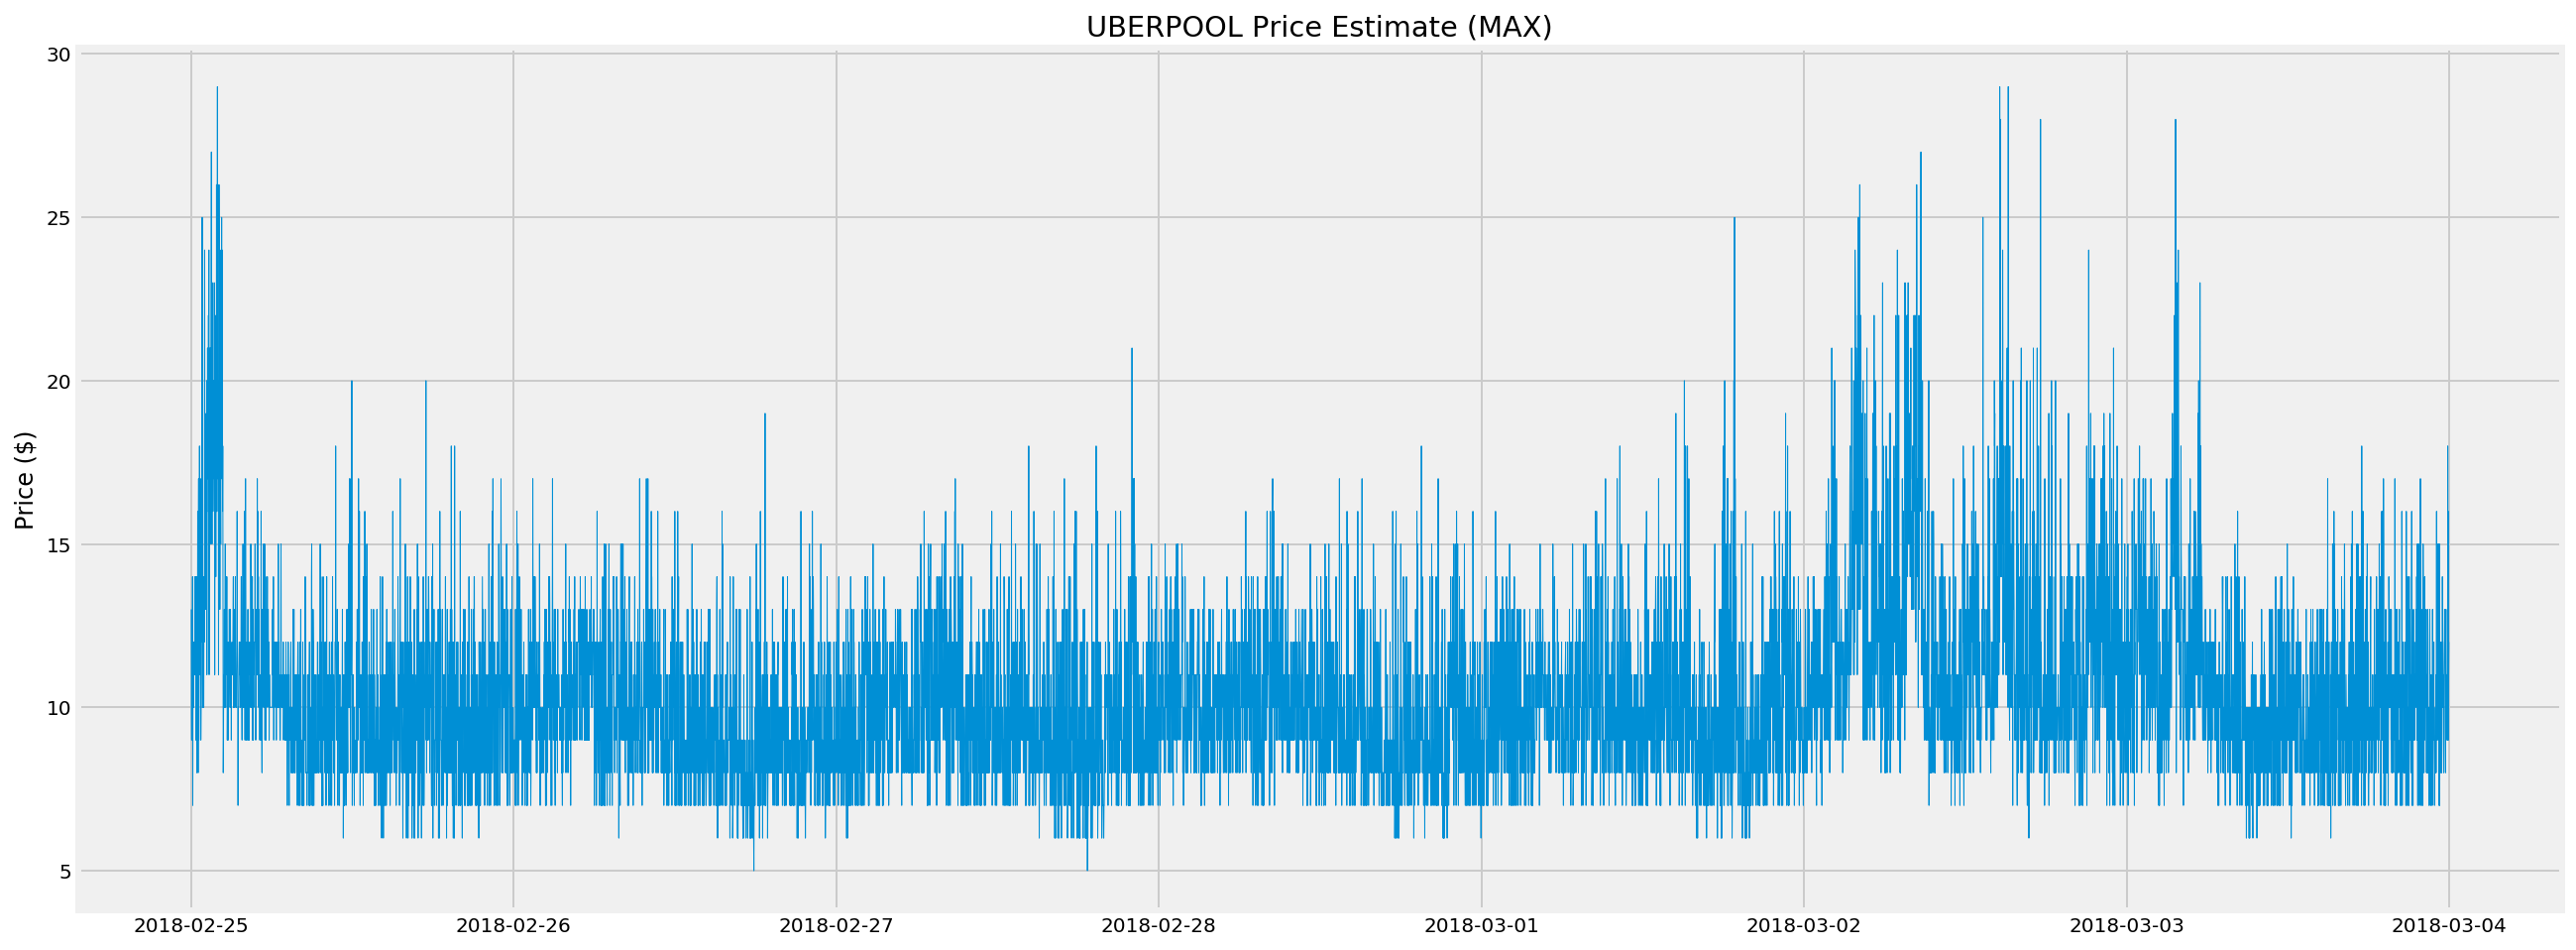

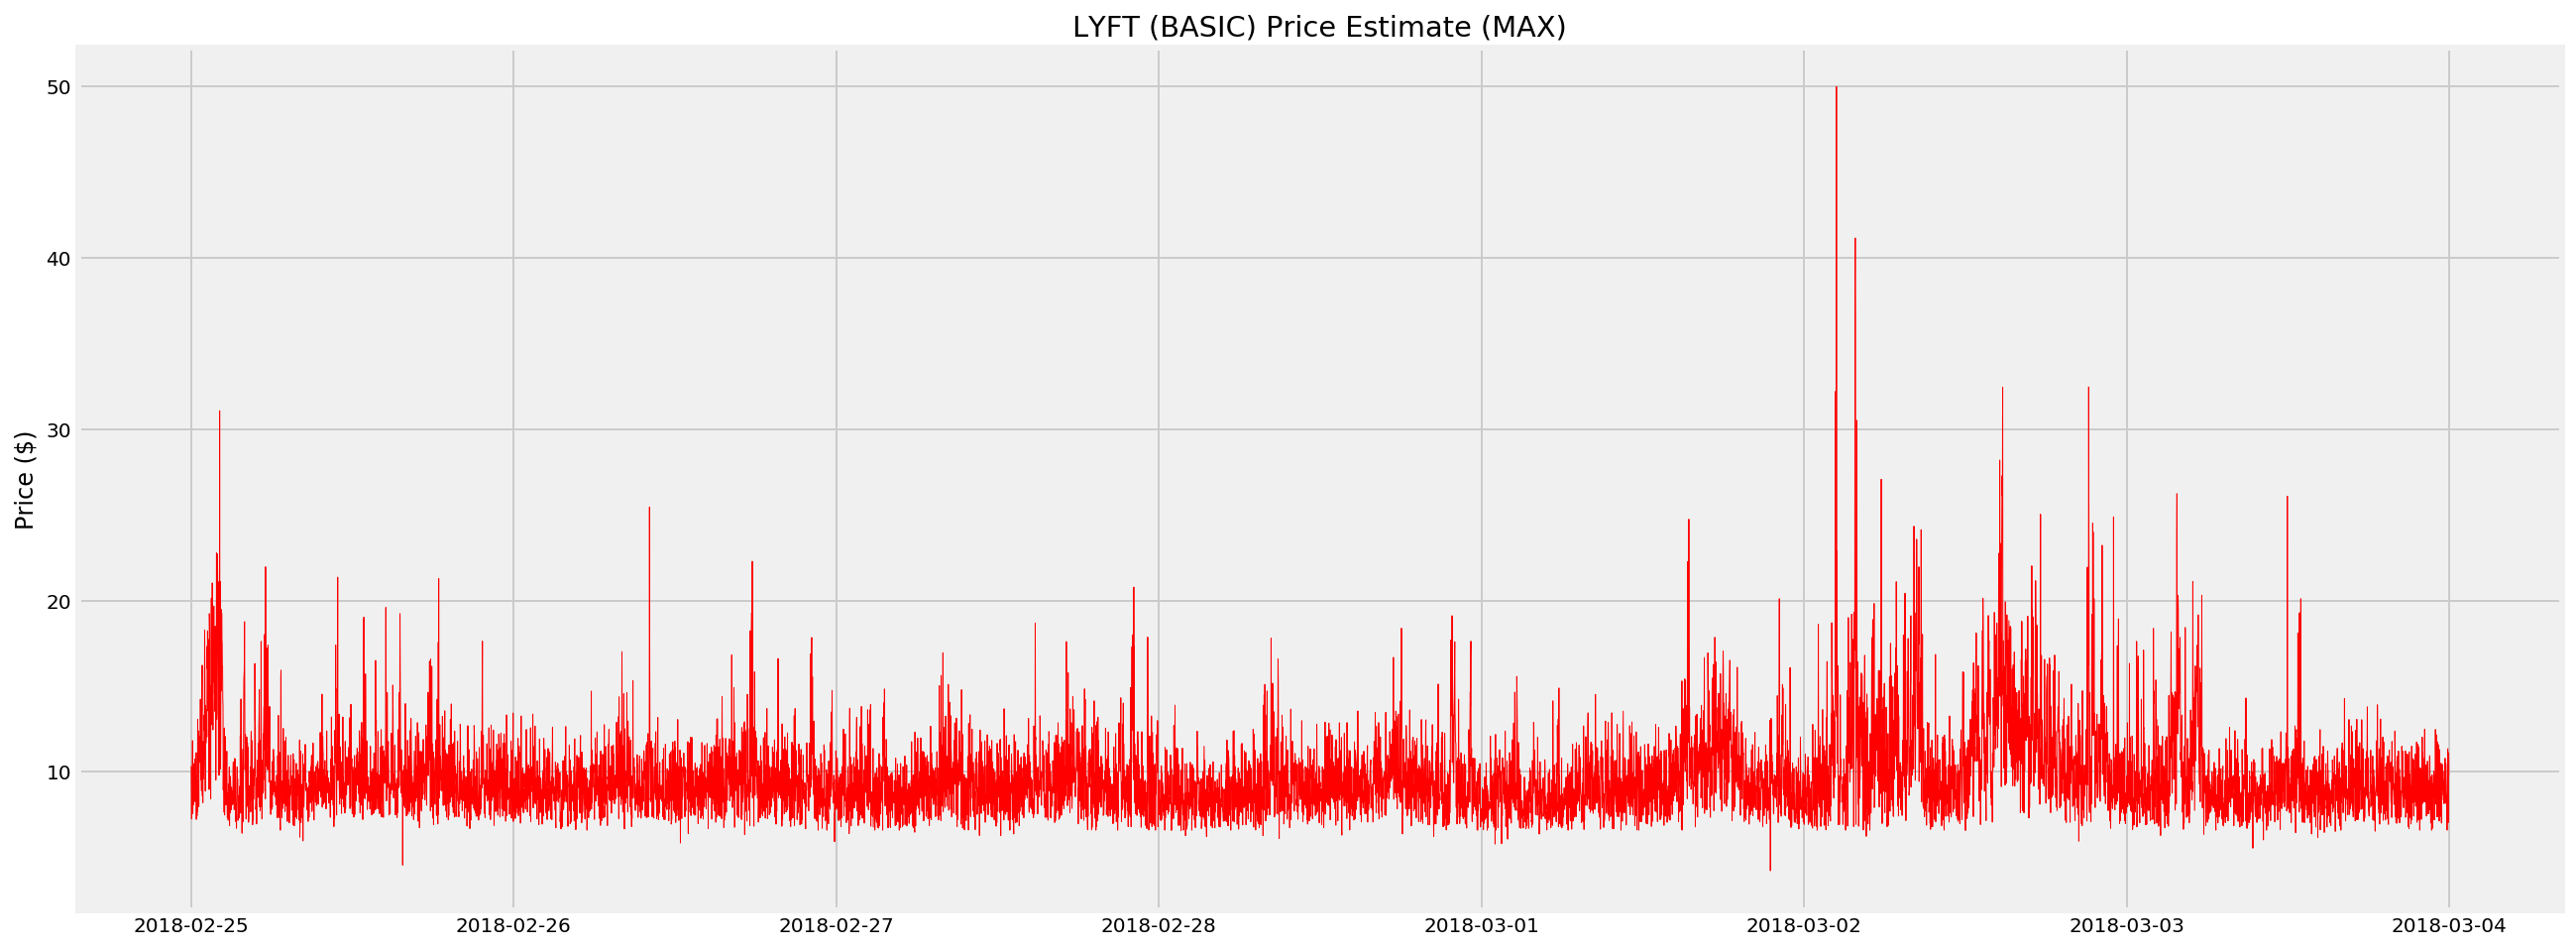

In [64]:
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot(df_uber1.index, df_uber1['high_estimate'], lw=0.5)
plt.title('UBERPOOL Price Estimate (MAX)')
plt.ylabel('Price ($)');
plt.show()

plt.plot(df_lyft1.index, df_lyft1['estimated_cost_max'], 'r', lw=0.5)
plt.title('LYFT (BASIC) Price Estimate (MAX)')
plt.ylabel('Price ($)');
plt.show();

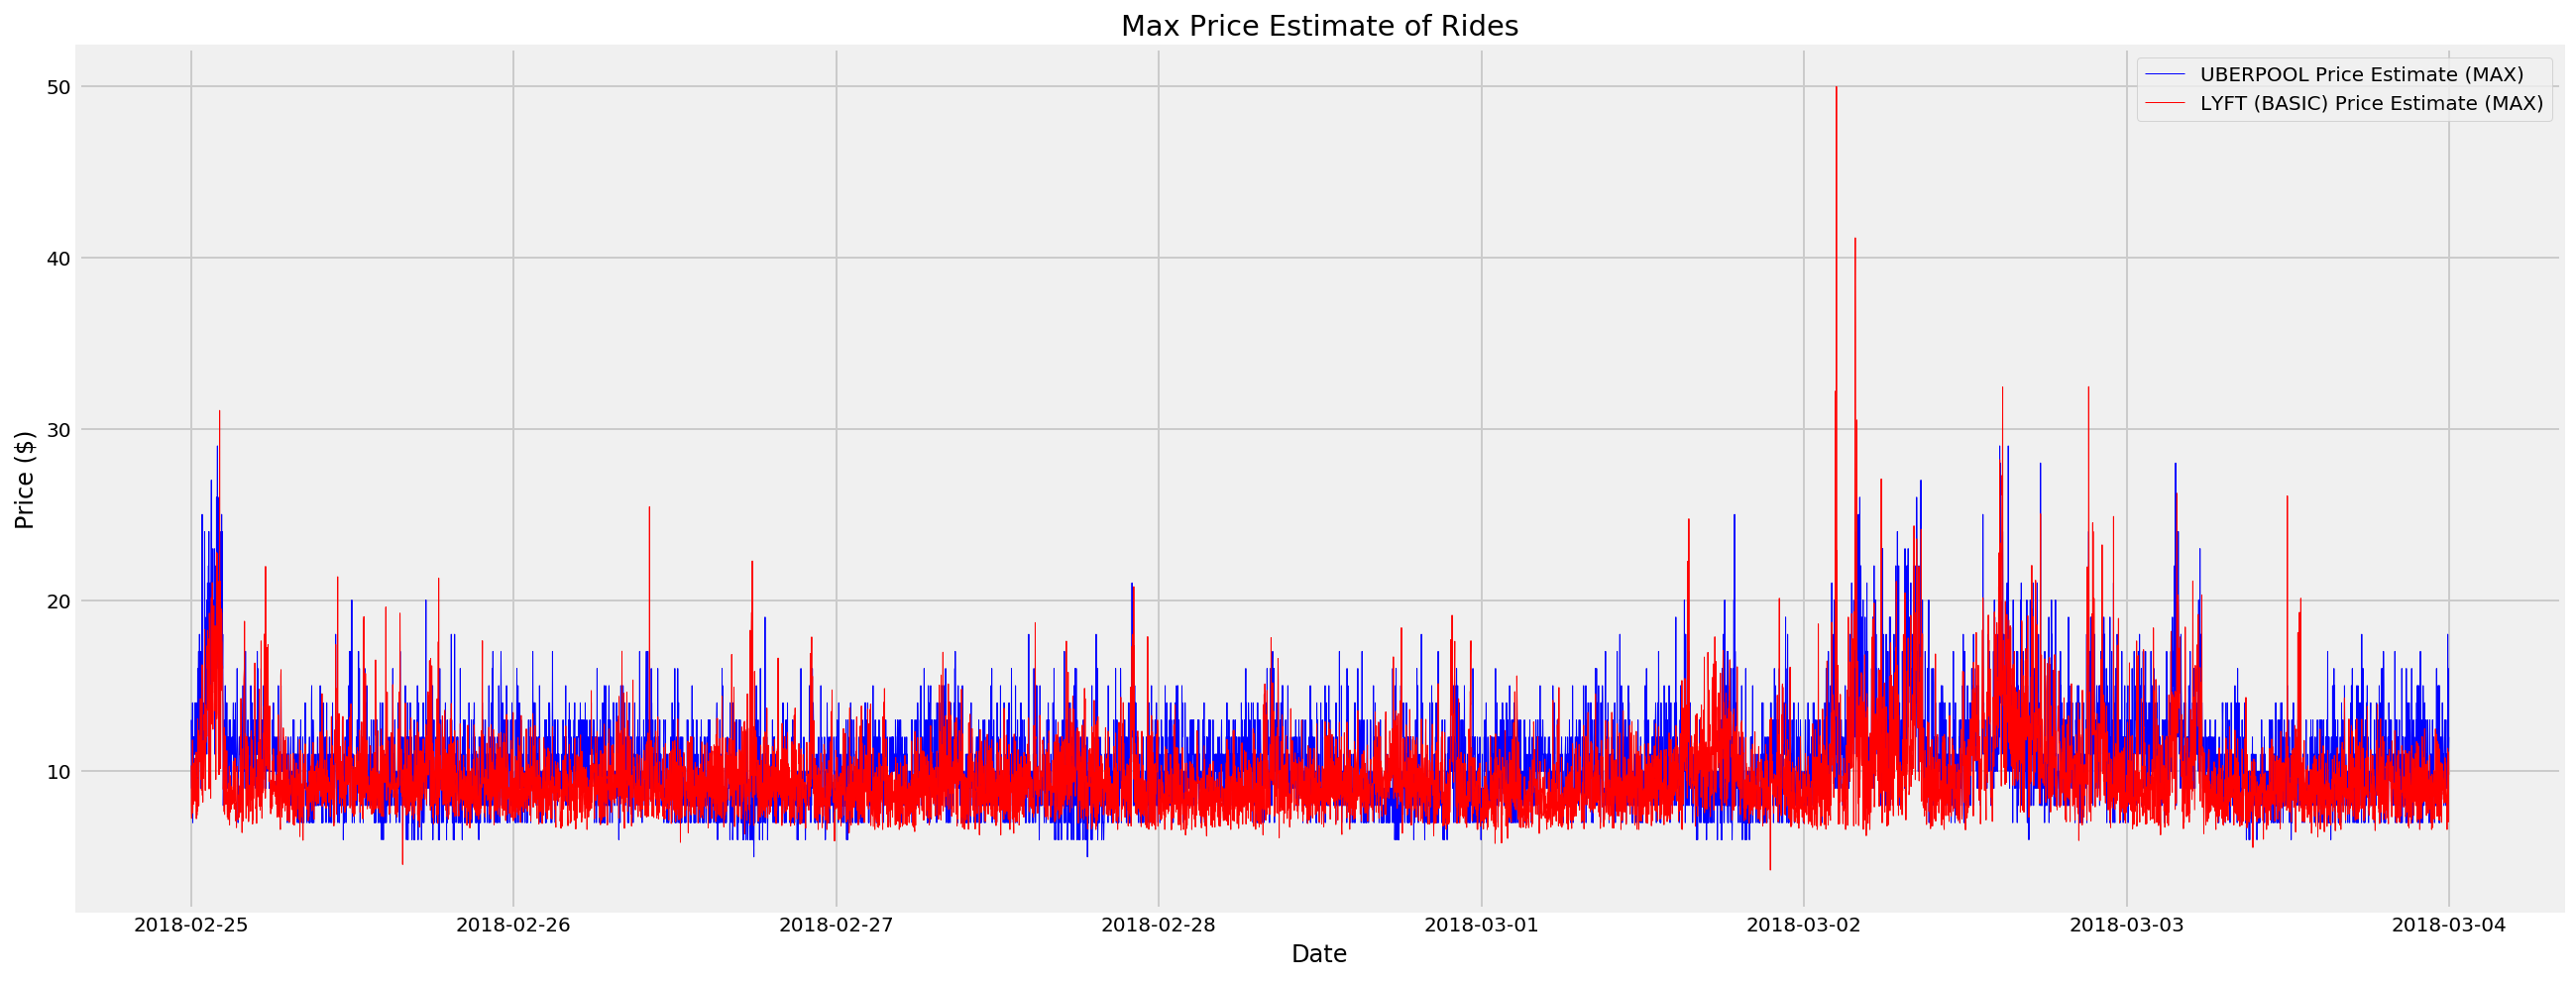

In [65]:
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot(df_uber1.index, df_uber1['high_estimate'], 'b-', label = 'UBERPOOL Price Estimate (MAX)', lw=0.5)
plt.plot(df_lyft1.index, df_lyft1['estimated_cost_max'], 'r-', label = 'LYFT (BASIC) Price Estimate (MAX)', lw=0.5)
plt.xlabel('Date'); plt.ylabel('Price ($)'); plt.title('Max Price Estimate of Rides')
plt.legend();

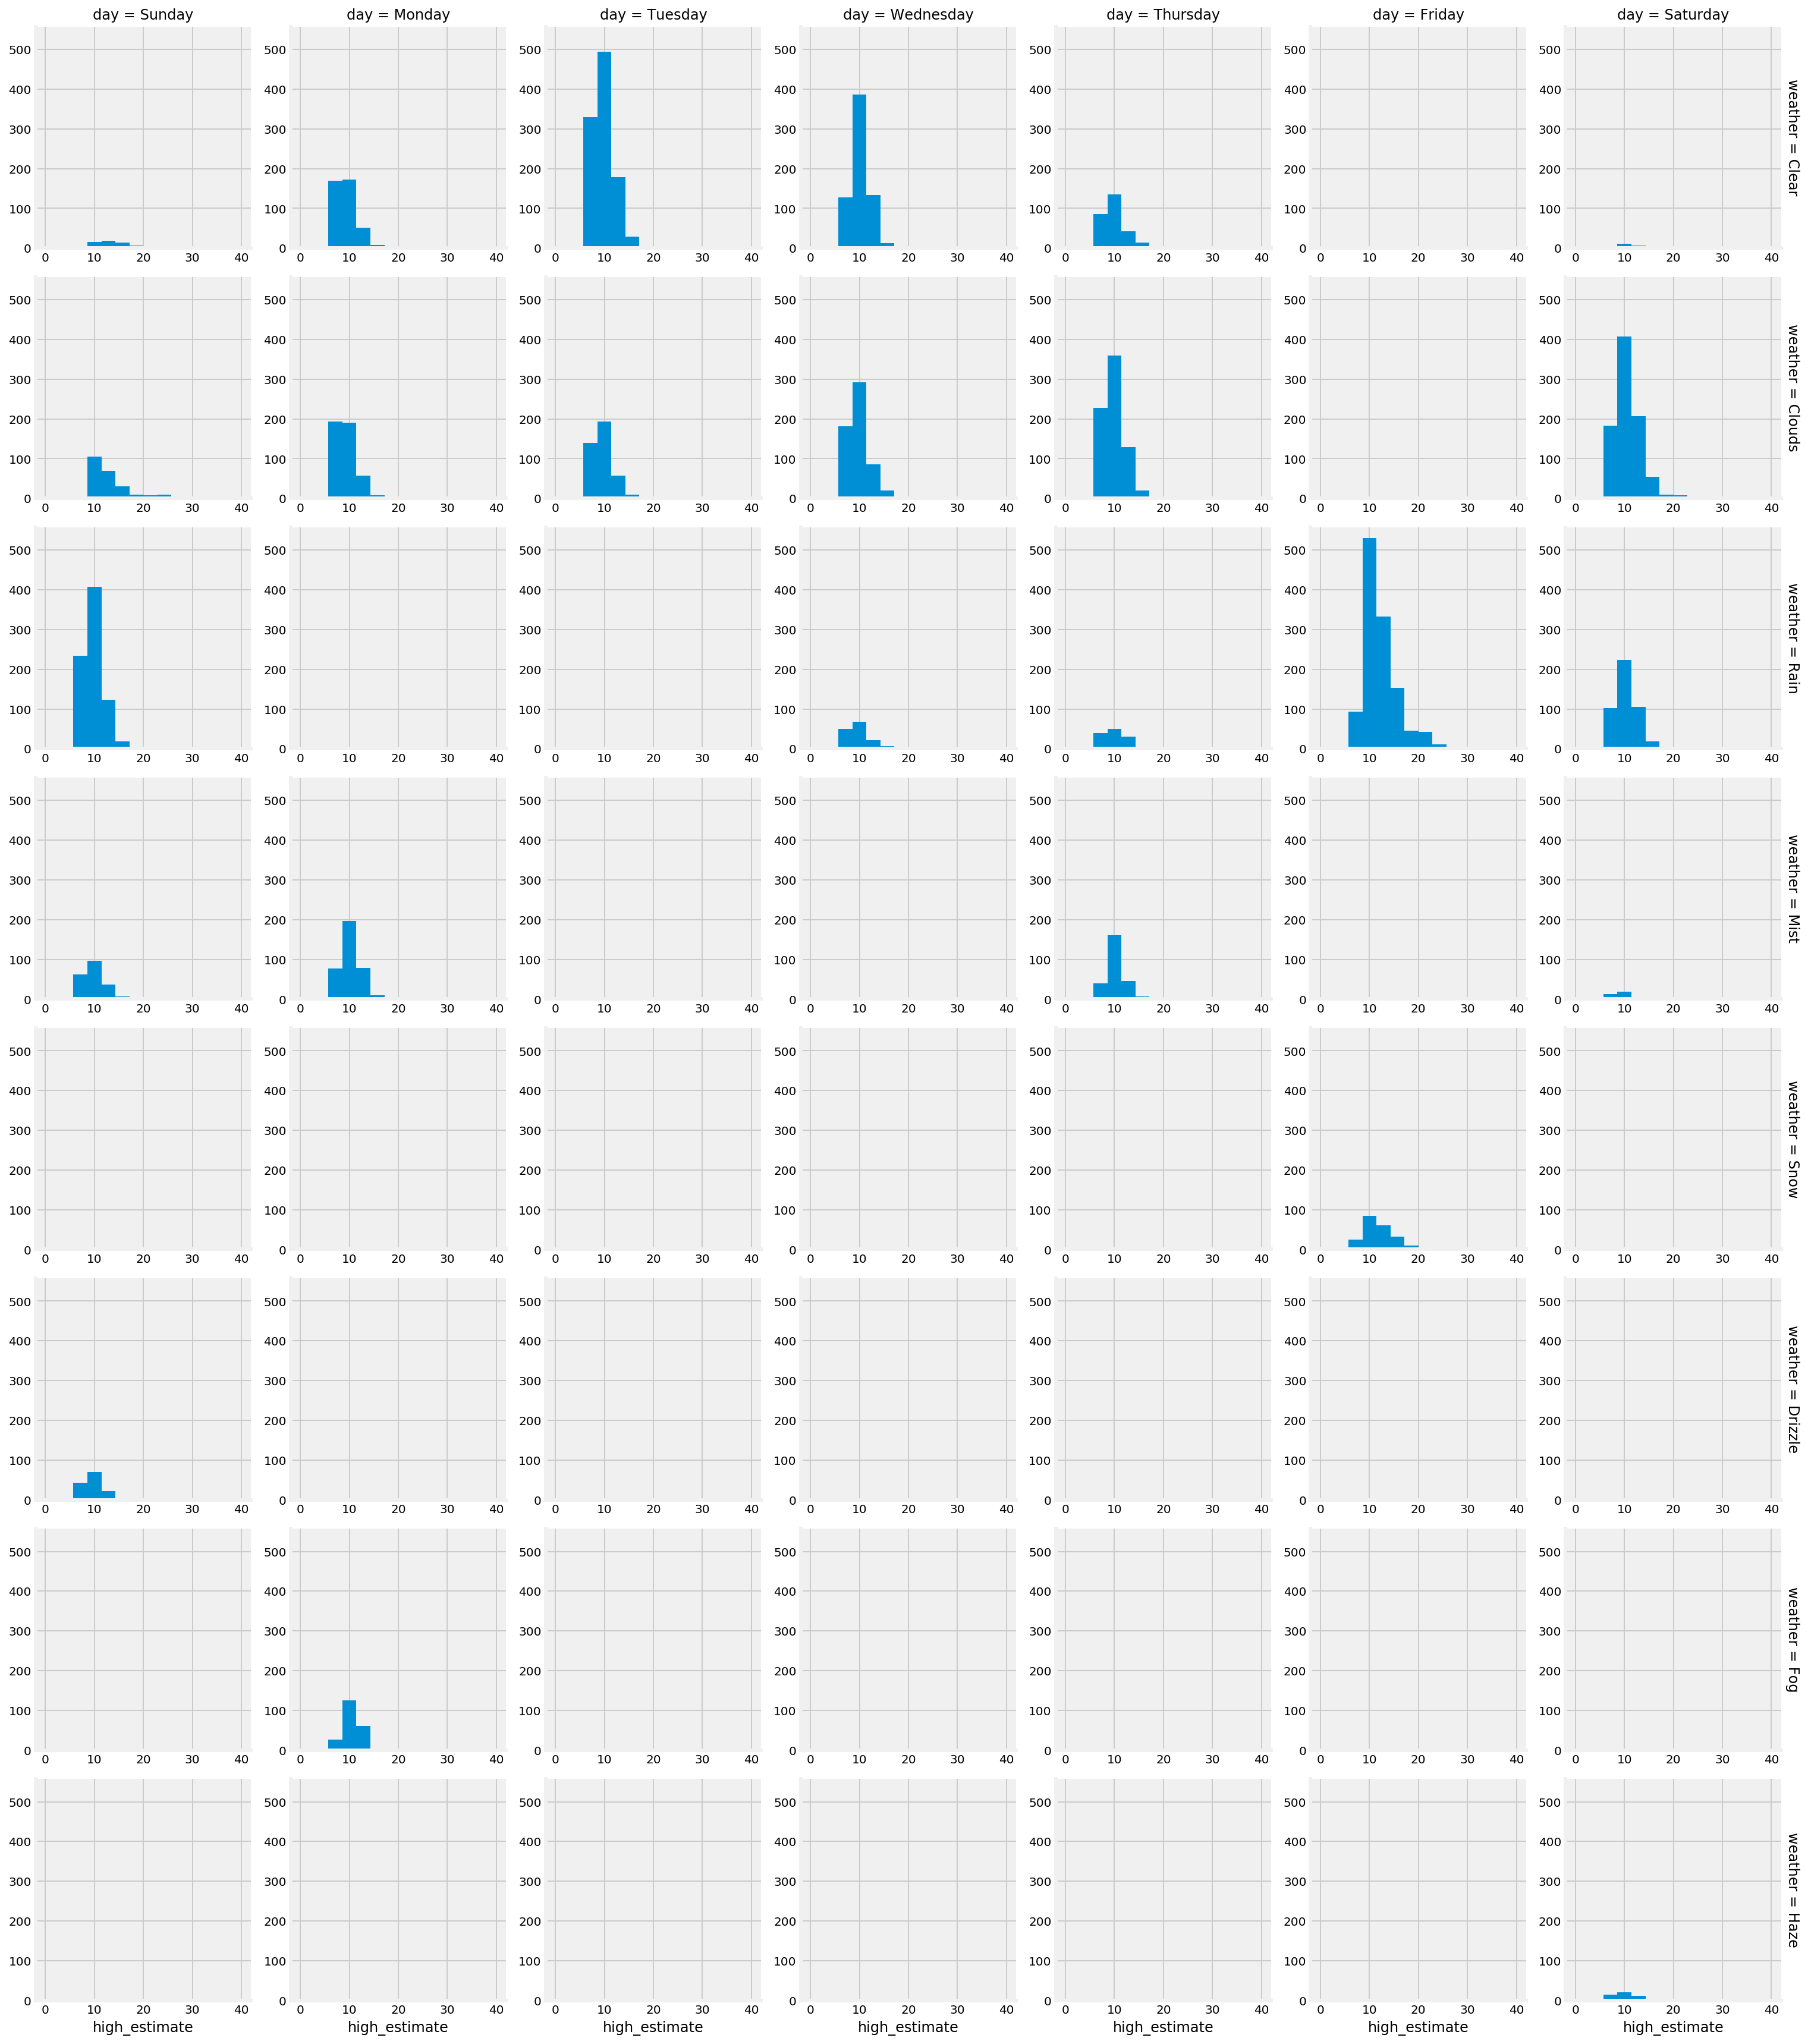

In [73]:
grid = sns.FacetGrid(df_uber1, row="weather", col="day", margin_titles=True)
grid.map(plt.hist, "high_estimate", bins=np.linspace(0, 40, 15));

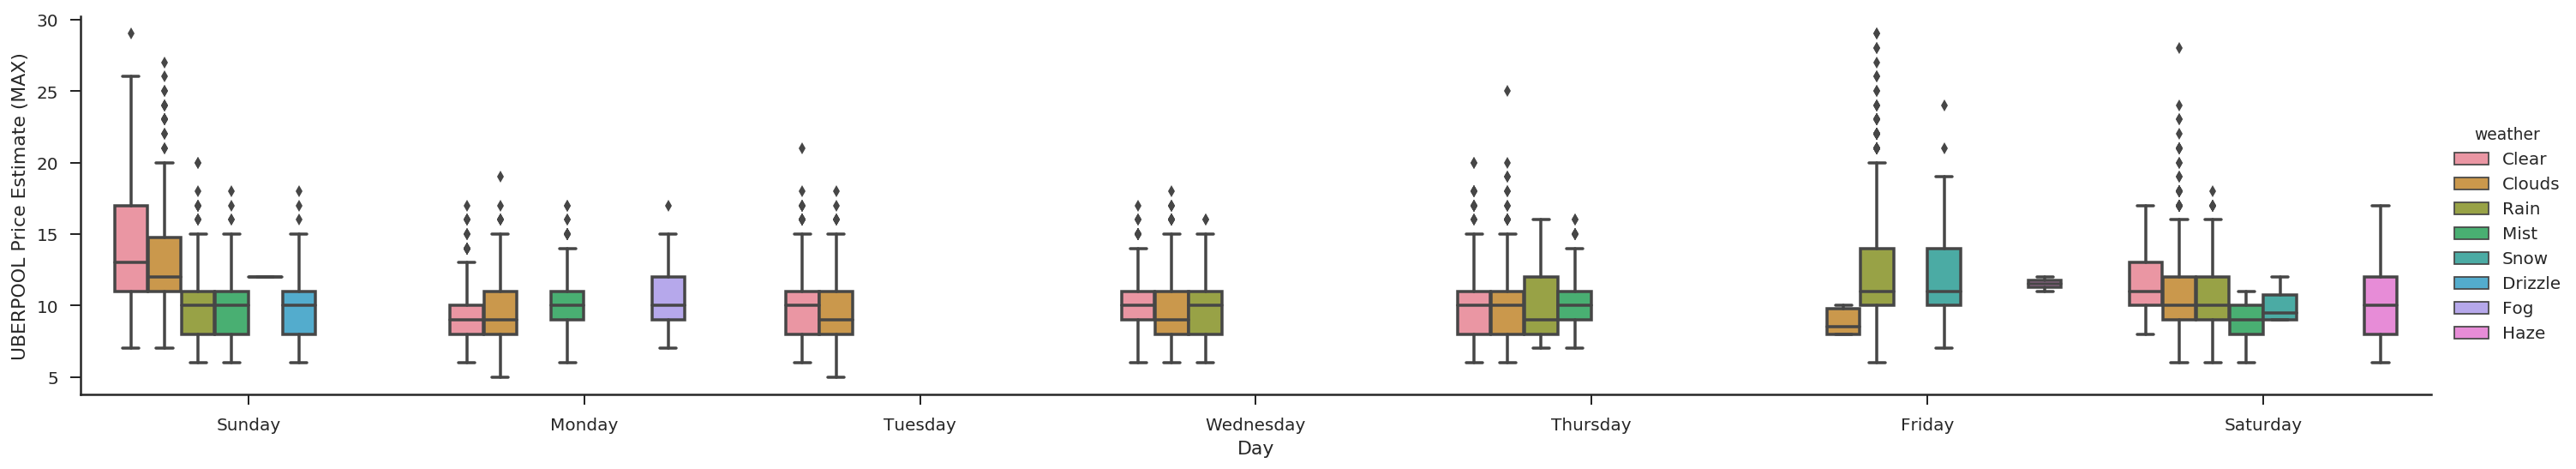

In [108]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "high_estimate", "weather", data=df_uber1, kind="box", aspect=5)
    g.set_axis_labels("Day", "UBERPOOL Price Estimate (MAX)");